FIAP - Tecnólogo em Inteligência Artificial

<img src="https://www.spdm.org.br/media/k2/items/cache/6da4961fc61d08e9b5f80c8ea30d8ffc_XL.jpg" alt="Girl in a jacket" width="300" align="right">

**Entrega**: XX/XX/2022, via Teams - IMPORTANTE: renomeie o notebook incluindo seu nome! 


# Checkpoint #5 - Classificação de Imagens com CNNs

## O problema 

O carcinoma ductal invasivo (IDC), também conhecido como carcinoma ductal infiltrante, é um câncer que começou a crescer em um ducto de leite e invadiu o tecido fibroso ou gorduroso da mama fora do ducto. IDC é **a forma mais comum de câncer de mama**, representando 80% de todos os diagnósticos de câncer de mama.

Sua *taxa de sobrevivência* de 5 anos é bastante alta --- quase 100% quando o tumor é detectado e tratado precocemente [fonte](https://www.cancer.org/cancer/breast-cancer/understanding-a-breast-cancer-diagnosis/breast-cancer-survival-rates.html). Ou seja, uma pesssoa com câncer identificado e tratado possui quase 100% de chances de viver nos próximos 5 anos de uma pessoa que não teve o câncer. 

O *prognóstico* depende do momento que o câncer foi identificado e seu *estadiamento* (processo para determinar a localização e a extensão do câncer no corpo de uma pessoa, ou seja, é a forma de determinar o avanço da doença no organismo de um paciente).

A forma de tratar o câncer depende do estadiamento e do seu tipo. 


## O desafio

Neste checkpoint seu grupo (utilizem a formação que desejarem) será desafiado a construir um classificador automático de câncer de mama por meio da análise de imagens. 

Vocês **devem adotar 2 abordagens distintas e compará-las** em termos de métricas de performance do modelo¹: 

1. treinar um modelo do zero (*from scratch*), com a arquitetura que desejarem usando CNNs;
2. treinar um modelo com *transfer learning* e/ou *fine tuning* a partir de uma rede pré-treinada no Imagenet².

A entrega do trabalho deve ser feita com o notebook executado e com células markdown narrando as decisões de design do grupo, bem como as justificativas. Não deixem de encerrarem com uma (breve!) conclusão sobre o trabalho.

OBSERVAÇÕES:

¹ vocês podem usar as métricas que quiserem desde que sejam métricas pertinentes para problemas de classificação. A comparação entre uma abordagem e outra deve fazer sentido! (Lembrem-se das boas práticas de Machine Learning)

² o TensorFlow possui diversas arquiteturas já treinadas na Imagenet. Vocês podem escolher a que desejarem, *justificando a escolha* (performance? tempo? etc.)


## Os dados

Vamos utilizar um dataset de imagens histopatológicas de mama. [Imagens histopatológicas](https://www.mediallabor.com.br/exame-histopatologico) são aquelas geradas com auxílio de um microscópico para analisar a composição das células de um tecido.

><font color="red">NOTA 1: </font> *claramente nosso classificador automático não é recomendado para **triagem** (detecção precoce) do câncer de mama, afinal, para coletarmos a imagem precisamos fazer uma biópsia da lesão, ou seja, é um procedimento invasivo! A biópsia só é feita em caso de alta suspeita de malignidade de uma lesão*. 

><font color="red">NOTA 2: </font> *então qual é o interesse deste tipo de dado? Como dissemos acima, este é o tipo de câncer de mama mais comum, porém existem outros! Nosso classificador não será útil na detecção, mas como identificação do tipo de câncer, para guiar estadiamento e tratamento*. 

<font color="CC0099">E acima de tudo, nosso maior objetivo é praticar uso de Deep Learning em imagens reais! </font> 


### Dataset

Nosso dataset virá de uma [competição do Kaggle](https://www.kaggle.com/paultimothymooney/breast-histopathology-images). Vocês podem encontrar mais informações sobre a descrição dos dados lá. 

### Como baixar o dataset? 

Recomendo que vocês utilizem o Colab para este trabalho, devido a presença de GPUs. Para acessar os dados vocês possuem 3 alternativas: 

1. Baixar os dados localmente, subindo uma cópia no seu Google Drive, fazer uma ligação (mount) do Colab com o Google Drive para ler as imagens de lá. Aqui o procedimento de download/upload só será feito uma vez, mas você precisa adaptar o código abaixo para fazer isso;  

2. Usar o código abaixo para baixar o dataset diretamente do Kaggle! Para isso vocês precisam: 

  a) ter uma conta no Kaggle [veja](https://www.kaggle.com/)

  b) baixar o arquivo .json com suas credenciais no seu computador (veja o tutorial da parte "API credentials" [deste link](https://github.com/Kaggle/kaggle-api))

  c) rodar os códigos abaixo para baixar o dataset no seu ambiente de desenvolvimento na nuvem. Tudo começa rodando a primeira célula na qual você abre um diálogo, indica onde está no seu computador o arquivo *kaggle.json* e subindo-o para o Colab. A código "instala" o arquivo automaticamente. 

  Nota: lembre-se que o Colab mata seus dados toda vez que encerra a execução, então para quem usar esta abordagem, precisa baixar e preparar o dataset toda vez que for começar a programar. 

3. Fazer uma mescla das 2 abordagens anteriores, baixando o arquivo via kaggle e salvando no seu Google Drive. Vocês já estão grandinhos para isso! =)




## Mão na massa! 

Aqui estou seguindo a abordagem **2.** para obter os dados. 
 



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 66 bytes


Aqui temos apenas um comando sendo executado para verificar se tudo deu certo. 

In [2]:
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/house-rent-prediction-dataset                House Rent Prediction Dataset                        82KB  2022-08-20 13:49:03           6213        197  1.0              
deepcontractor/mcdonalds-india-menu-nutrition-facts            McDonald's India : Menu Nutrition Dataset             5KB  2022-07-28 17:08:52           5082        180  0.9411765        
arianazmoudeh/airbnbopendata                                   Airbnb Open Data                                     10MB  2022-08-01 15:58:10           3272         99  0.9705882        
iamsouravbanerjee/world-population-dataset                     Wo

Agora sim, **baixando o dataset** no nosso ambiente de desenvolvimento. 

In [3]:
!kaggle datasets download "paultimothymooney/breast-histopathology-images"

100% 3.09G/3.10G [00:22<00:00, 162MB/s]
100% 3.10G/3.10G [00:22<00:00, 150MB/s]


Crie uma pasta *data* e descompacte o dataset nela.

In [4]:
!mkdir data
!unzip breast-histopathology-images.zip -d data 

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.png  
  inflating: data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2001_class0.png  
  inflating: data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2251_class0.png  
  inflating: data/IDC_regular_ps50_idx5

## Alguns imports, alterem conforme necessidade

In [1]:
from glob import glob
import random
import numpy as np

from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras

from keras.utils.np_utils import to_categorical

## Preparando os dados para uso

Descubra os nomes das imagens da classe 0 (negativa, não câncer) e da classe 1 (positiva, câncer). 

In [2]:
imagePatches = glob("/content/data/IDC_regular_ps50_idx5/**/*.png", 
                    recursive=True)

class0 = []
class1 = []

for filename in imagePatches:
  if filename.endswith("class0.png"):
    class0.append(filename)
  else:
    class1.append(filename)

Diminua o tamanho do dataset, pois não queremos demorar demais no treinamento. 

In [3]:
nClass0 = len(class0)
nClass1 = len(class1)

print(f"Existem {nClass0} exemplos negativos e {nClass1} exemplos positivos.")
print(f"Vamos usar apenas uma amostragem igualitária de cada classe!")
print(f"Então nosso dataset final deve ter {nClass1} exemplos de cada classe.")

sampled_class0 = random.sample(class0, nClass1)
sampled_class1 = random.sample(class1, nClass1)

print(f"Dataset final: ")
print(f"  - N classe negativa: {len(sampled_class0)}")
print(f"  - N classe positiva: {len(sampled_class1)}")

Existem 198738 exemplos negativos e 78786 exemplos positivos.
Vamos usar apenas uma amostragem igualitária de cada classe!
Então nosso dataset final deve ter 78786 exemplos de cada classe.
Dataset final: 
  - N classe negativa: 78786
  - N classe positiva: 78786


Cria um array de tuplas para cada classe, sendo que a tupla está no formato `(imagem, label)`, sendo:
  - `imagem`: a imagem no formato de matriz de pixels
  - `label`: int indicando o label (0 ou 1)

In [4]:
from matplotlib.image import imread
import cv2

def get_image_arrays(data, label):
  img_arrays = []
  for i in data:
    if i.endswith(".png"):
      img = cv2.imread(i, cv2.IMREAD_COLOR)
      img_sized = cv2.resize(img, (32, 32), interpolation=cv2.INTER_LINEAR)
      img_arrays.append([img_sized, label])
  return img_arrays 

class0_array = get_image_arrays(sampled_class0, 0)
class1_array = get_image_arrays(sampled_class1, 1)

Junte os dados numa coisa só, e misture, mesclando as imagens para trazer aleatoriedade na seleção.

In [5]:
all_data = np.concatenate((class0_array, class1_array))
random.seed(42)
random.shuffle(all_data)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Separe os dados (pixels), dos labels (ints). Devemos terminar com 157572 imagens, escaladas em 50x50 pixels, sendo que cada imagem é expressa em 3 canais (RBG).

In [6]:
X = []
y = []
for image, label in all_data:
  X.append(image)
  y.append(label)

X = np.array(X).reshape(-1, 32, 32, 3)
X.shape

(157572, 32, 32, 3)

Já estou dando para vocês a divisão de TREINO e TESTE, sendo 75%/25%, respectivamente. O shape final deve ser algo +/- assim:

  > `(118179, 50, 50, 3) (39393, 50, 50, 3) (118179, 2) (39393, 2)`

Apesar de ser um problema de classificação binária, vamos colher as predições e tratar os labels como pequenos arrays de 2 posições, para obtermos as probabilidades de cada exemplo pertencer a cada uma das classes. Por isso o `to_categorical()`. Não se preocupem, os códigos do TensorFlow/Keras são robustos para trabalhar desta forma (inclusive já fizemos isso em sala).



In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(118179, 32, 32, 3) (39393, 32, 32, 3) (118179, 2) (39393, 2)


## e agora??? 

Agora é com vocês! Bom trabalho! =) 

DICAS: 
- Minha avaliação não será baseada nas melhores métricas obtidas, mas na completude do projeto. Se quiserem limitar o tamanho do dataset para acelerar a codificação/treinamento, tudo bem!
- Deixei o código pronto para escalar as imagens para 50x50 pixels. Se quiserem outra resolução, vão em frente!
- Na hora de fazerem transfer learning e/ou fine tuning, lembrem-se que cada arquitetura possui uma resolução preferida de entrada. Consultem na internet/documentação àquela da arquitetura escohida. 
- Vocês podem gostar [deste tutorial](https://www.pyimagesearch.com/2019/06/24/change-input-shape-dimensions-for-fine-tuning-with-keras/) para usar transfer com datasets com dimensões diferentes daquela original da rede.
- Vejam o exemplo da [documentação da VGG16](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16) para conhecerem os parâmetros a serem alterados na rede.
- A normalização das imagens para alimentar a rede passa por excluir o "valor médio" do pixel do dataset. Para transfer isso é feito com funções auxiliares de cada arquitetura. Revejam os tutoriais que usamos em sala para recaptularem como fazer. Para treinamento do zero (from scratch), vocês podem apenas normalizar os pixels num intervalo [0, 1]. Também fizemos isso em alguns tutoriais. 

---

#Importando algumas bibliotecas que utilizarei para a criação e avaliação da CNN

In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr

print(f"Tensorflow Version {tf.__version__}")

Tensorflow Version 2.8.2


#Criando o modelo de CNN, e suas camadas. Utilizando o modelo do 0, mais para frente do codigo utilizaremos o Transfer Learning

In [ ]:
model = tf.keras.models.Sequential(
        [
        Rescaling(1./255, input_shape = (32, 32, 3)),
        tf.keras.layers.Conv2D(16, (3, 3), activation = "relu", input_shape = (32, 32, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3, 3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3, 3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation = "relu"),
        tf.keras.layers.Dense(64, activation = "relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(2, activation = "sigmoid")
        ]
      )

#Visualizando a estrutura do modelo

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 50, 50, 3)         0         
                                                                 
 conv2d_49 (Conv2D)          (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 24, 24, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 11, 11, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 9, 9, 64)        

#Compilando o modelo

In [ ]:
model.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])

#Criando logica de Early Stopping, utilizei uma paciencia de 10, pois nas epocas vamos utilizar multiplos de 10.

In [ ]:
es = EarlyStopping(monitor = "val_accuracy", patience = 10, restore_best_weights = True)

#Treinando modelo

In [ ]:
history = model.fit(X_train, y_train, 
                    validation_data = (X_test, y_test), 
                    epochs = 50, 
                    batch_size = 50, 
                    callbacks = [es])

Epoch 1/50
2364/2364 [==============================] - 15s 6ms/step - loss: 0.3344 - accuracy: 0.8576 - val_loss: 0.2877 - val_accuracy: 0.8796
Epoch 2/50
2364/2364 [==============================] - 15s 6ms/step - loss: 0.3058 - accuracy: 0.8791 - val_loss: 0.3393 - val_accuracy: 0.8863
Epoch 3/50
2364/2364 [==============================] - 14s 6ms/step - loss: 0.2975 - accuracy: 0.8839 - val_loss: 0.2990 - val_accuracy: 0.8892
Epoch 4/50
2364/2364 [==============================] - 14s 6ms/step - loss: 0.2887 - accuracy: 0.8866 - val_loss: 0.2888 - val_accuracy: 0.8892
Epoch 5/50
2364/2364 [==============================] - 14s 6ms/step - loss: 0.2823 - accuracy: 0.8884 - val_loss: 0.2943 - val_accuracy: 0.8886
Epoch 6/50
2364/2364 [==============================] - 14s 6ms/step - loss: 0.2776 - accuracy: 0.8898 - val_loss: 0.3137 - val_accuracy: 0.8811
Epoch 7/50
2364/2364 [==============================] - 15s 6ms/step - loss: 0.2751 - accuracy: 0.8899 - val_loss: 0.2634 - val_ac

#Plotando grafico de Accuracy e Validation Accuracy, validando acuracia por epoca. <br><br>
###Podemos identificar que a partir da 10a epoca, o modelo apresentou uma linearidade no aprendizado, se tivessemos parado na primeira dezena de epocas, o modelo provavelmente teria o mesmo resultado que se concluisse todas as epocas. Porém, como no grafico a seguir, podemos identificar que a Loss não tem a mesma linearidade.

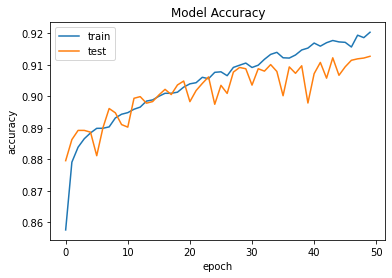

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Avaliando o modelo com os dados de test e os labels de teste

In [ ]:
eval = model.evaluate(X_test, y_test, batch_size = 50)
print(f"LOSS: {eval[0]:.2f}%, ACC: {eval[1]:.2f}%")

788/788 [==============================] - 3s 4ms/step - loss: 0.2436 - accuracy: 0.9128
LOSS: 0.24%, ACC: 0.91%


#Plotando grafico de Accuracy e Validation Accuracy, validando acuracia por epoca. <br><br>
###Podemos identificar que diferente do aprendizado com os testes, o modelo não apresenta tal linearidade, e sim continua reduzindo a loss, a ponto que chegue na epoca final. 

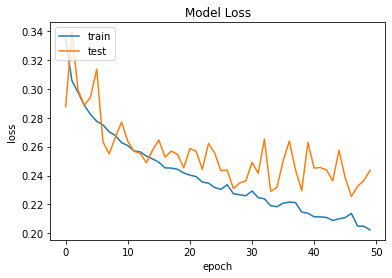

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Prevendo em cima dos dados de teste

In [ ]:
predict = model.predict(X_test)

#Criando a matriz de confusão

In [25]:
def plot_matriz(y_test, predict):
  y_pred = np.argmax(predict, axis = 1)
  y_true = np.argmax(y_test, axis = 1)

  f, ax = plt.subplots(figsize = (6, 6))

  matrix = cm(y_true, y_pred)
  sns.heatmap(matrix, annot = True, ax = ax, fmt= '.1f')
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix");

#Plotando a matriz de confusão.


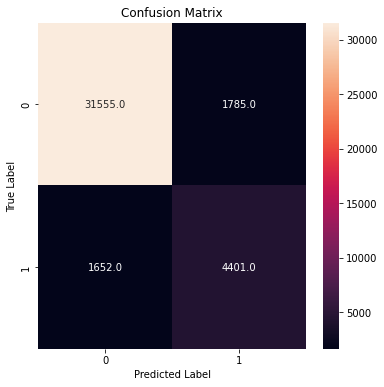

In [ ]:
plot_matriz(y_test, predict)

#Visualizando algumas metricas adicionais

In [24]:
def metrics(y_test, predict):
  y_pred = np.argmax(predict, axis = 1)
  y_true = np.argmax(y_test, axis = 1)

  print(cr(y_true, y_pred))

In [ ]:
metrics(y_test, predict)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     33340
           1       0.71      0.73      0.72      6053

    accuracy                           0.91     39393
   macro avg       0.83      0.84      0.83     39393
weighted avg       0.91      0.91      0.91     39393



---

#Agora vamos para o Transfer Learning!!!

##Utilizaremos a VGG16!

#Importando LIBS

In [8]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping as es
from tensorflow.keras.optimizers import Adam

#Processando os dados

In [9]:
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

#Definindo a VGG16 construtor e definindo como não ser treinavel

In [10]:
base_model = VGG16(weights = "imagenet", include_top = False,
                   input_shape = X_train[0].shape)

base_model.trainable = False

base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

#Adicionando algumas camadas e aplicando-as na lista layers

In [11]:
flatten_layer = layers.Flatten()
dense_layer = layers.Dense(128, activation = "relu")
dense_layer2 = layers.Dense(64, activation = "relu")
dropout_layer = layers.Dropout(0.5)
prediction_layer = layers.Dense(2, activation = "sigmoid")

layers = [base_model, flatten_layer, dense_layer, dense_layer2, dropout_layer, prediction_layer]

#Aplicando a lista no modelo sequencial

In [12]:
model = models.Sequential(layers)

#Verificando aestrutura do modelo com transfer learning

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 14,788,738
Trainable params: 74,050
Non-tr

#Definindo logica de EarlyStopping

In [14]:
es = es(monitor = "val_accuracy", patience = 5, restore_best_weights = True)

#Compilando modelo

In [15]:
model.compile(
    optimizer = Adam(learning_rate = 0.001), 
    loss = "categorical_crossentropy", 
    metrics = ["accuracy"]
    )

#Treinando!!!

In [16]:
history = model.fit(X_train, y_train, 
                    validation_data = (X_test, y_test), 
                    epochs = 50, 
                    callbacks = [es])

Epoch 1/50
3694/3694 [==============================] - 44s 11ms/step - loss: 0.3600 - accuracy: 0.8709 - val_loss: 0.3007 - val_accuracy: 0.8815
Epoch 2/50
3694/3694 [==============================] - 40s 11ms/step - loss: 0.3035 - accuracy: 0.8789 - val_loss: 0.2856 - val_accuracy: 0.8828
Epoch 3/50
3694/3694 [==============================] - 41s 11ms/step - loss: 0.2936 - accuracy: 0.8823 - val_loss: 0.2858 - val_accuracy: 0.8772
Epoch 4/50
3694/3694 [==============================] - 40s 11ms/step - loss: 0.2870 - accuracy: 0.8848 - val_loss: 0.2794 - val_accuracy: 0.8858
Epoch 5/50
3694/3694 [==============================] - 40s 11ms/step - loss: 0.2796 - accuracy: 0.8879 - val_loss: 0.2761 - val_accuracy: 0.8919
Epoch 6/50
3694/3694 [==============================] - 40s 11ms/step - loss: 0.2724 - accuracy: 0.8904 - val_loss: 0.2816 - val_accuracy: 0.8869
Epoch 7/50
3694/3694 [==============================] - 41s 11ms/step - loss: 0.2654 - accuracy: 0.8924 - val_loss: 0.2870 -

#Conforme o grafico de history anterior, com o modelo sem transfer, este modelo apresenta uma variancia maior entre treino e test do que o modelo anterior.

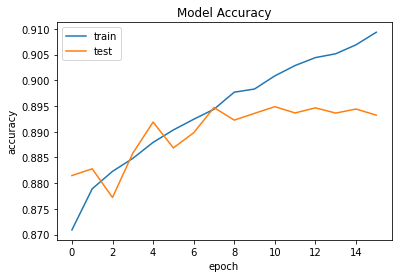

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Avaliando o modelo com transfer, podemos identificar que os modelos podem estar bem equivalentes

In [20]:
eval = model.evaluate(X_test, y_test, batch_size = 50)
print(f"LOSS: {eval[0]:.2f}%, ACC: {eval[1]:.2f}%")

788/788 [==============================] - 7s 9ms/step - loss: 0.2879 - accuracy: 0.8949
LOSS: 0.29%, ACC: 0.89%


#Grafico de Loss do modelo com transfer!

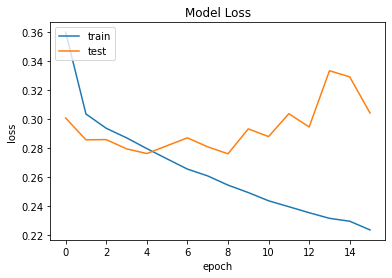

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Predict nos dados de test

In [22]:
predict = model.predict(X_test)

#Matriz de confusão

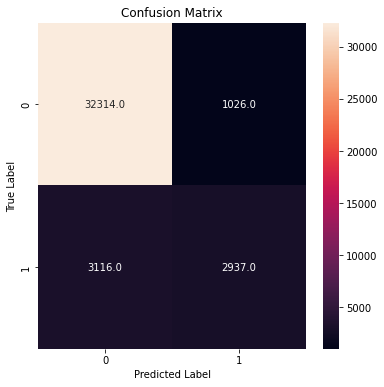

In [26]:
plot_matriz(y_test, predict)

#Algumas outras metricas

In [27]:
metrics(y_test, predict)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     33340
           1       0.74      0.49      0.59      6053

    accuracy                           0.89     39393
   macro avg       0.83      0.73      0.76     39393
weighted avg       0.89      0.89      0.89     39393



#Conclusão final

###De acordo com ambos os modelos, podemos identificar que a arquitetura e estrutura de ambos os modelos foram quase que indecisivas para as metricas finais, porém o primeiro modelo apresentou uma acertividade melhor em Recall e F1-Score para os labels (1 = Tem Cancer).
###Podemos realizar mais testes, alterando hiperparametros, e diminuindo o tamanho do data set, ou até mesmo utilizando um EarlyStopping com paciencia maior no segundo modelo (Com transfer Learnig), para ter uma acertividade parecida com o primeiro modelo (Sem Transfer)!!!

####obs: tive de reescalar o tamanho da imagem para 32x32 para não consumir todo a RAM do ambiente de execução.